In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("bandit_analysis_results.csv")

In [3]:
df

,Repository,Commit Hash,Severity_High,Severity_Medium,Severity_Low,Confidence_High,Confidence_Medium,Confidence_Low,CWE_Counts
0,activitywatch,01b3fb4468156f3f8ba95e5495eaad4ded1f706b,8,33,626,653,11,3,"{""78"": 80, ""400"": 2, ""703"": 517, ""20"": 17, ""25..."
1,activitywatch,038d48a656845f76327234ff05bbbb1f28941654,8,33,626,653,11,3,"{""78"": 80, ""400"": 2, ""703"": 517, ""20"": 17, ""25..."
2,activitywatch,04fbfacbea41650c961f39550516a893602e658d,8,33,626,653,11,3,"{""78"": 80, ""400"": 2, ""703"": 517, ""20"": 17, ""25..."
3,activitywatch,0520dd0727f261214742c98398f5e471bf7c6b70,8,33,626,653,11,3,"{""78"": 80, ""400"": 2, ""703"": 517, ""20"": 17, ""25..."
4,activitywatch,05a8a40e83bd102ad07f0cb34a9b69ac0ba9e5bc,8,33,626,653,11,3,"{""78"": 80, ""400"": 2, ""703"": 517, ""20"": 17, ""25..."
...,...,...,...,...,...,...,...,...,...
293,scrapy,f44ca39fa23f07c857a34309d79db6394c5faefb,33,31,1306,1351,18,1,"{""703"": 1193, ""78"": 68, ""20"": 9, ""259"": 10, ""3..."
294,scrapy,f4d8d6d8acf8ed26230c3c2b2b51425659de7105,23,26,1289,1320,17,1,"{""703"": 1187, ""78"": 62, ""20"": 7, ""259"": 9, ""33..."
295,scrapy,f796d8780c75543eadb6cf3689c7d0ca02896f0c,23,24,1275,1306,15,1,"{""703"": 1173, ""78"": 62, ""20"": 7, ""259"": 9, ""33..."
296,scrapy,f7af7b282d6d3b36689cc192e6f78c065e32fb89,33,31,1306,1351,18,1,"{""703"": 1193, ""78"": 68, ""20"": 9, ""259"": 10, ""3..."


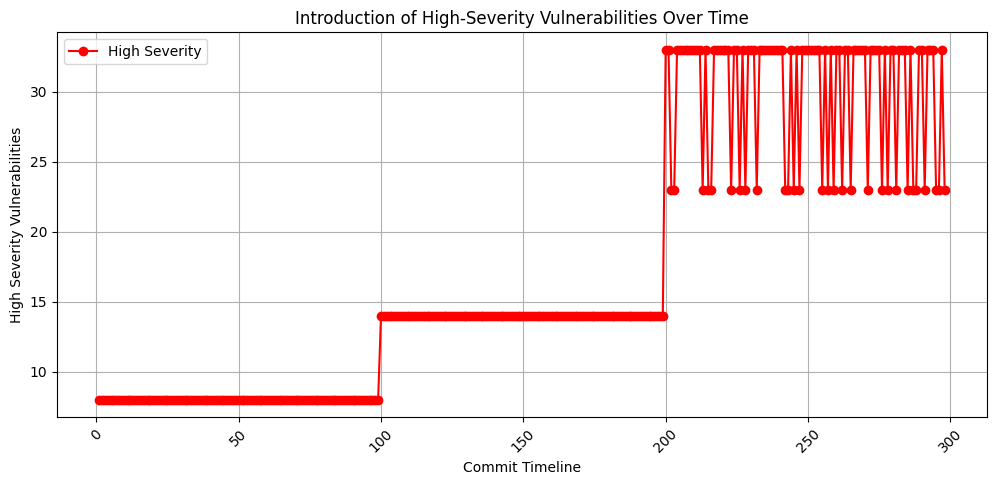

In [9]:

import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("bandit_analysis_results.csv")

# Check for timestamps; if not present, create a sequential index
if "Timestamp" in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df = df.sort_values("Timestamp")  # Ensure chronological order
    x_col = "Timestamp"
else:
    df["Commit Index"] = range(1, len(df) + 1)
    x_col = "Commit Index"

# Convert severity column to numeric (assuming binary indicator or count)
df["Severity_High"] = pd.to_numeric(df["Severity_High"], errors="coerce").fillna(0)

# Plot high-severity vulnerabilities over time
plt.figure(figsize=(12, 5))
plt.plot(df[x_col], df["Severity_High"], marker="o", linestyle="-", color="r", label="High Severity")
plt.xlabel("Commit Timeline" if x_col == "Commit Index" else "Time")
plt.ylabel("High Severity Vulnerabilities")
plt.title("Introduction of High-Severity Vulnerabilities Over Time")
plt.legend()
plt.xticks(rotation=45)  # Improve readability
plt.grid()
plt.show()


In [6]:
!pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


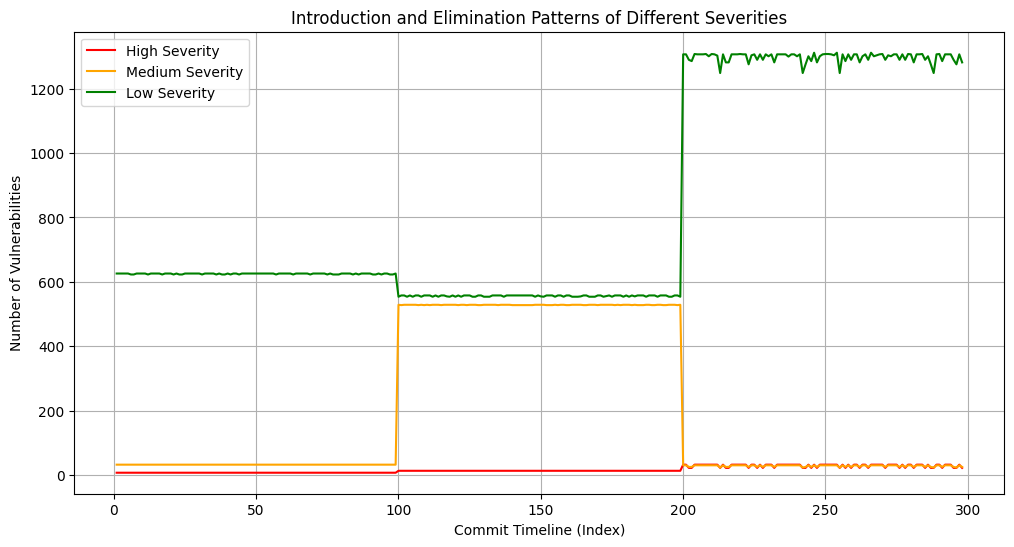

In [7]:
import seaborn as sns

# Convert to integer type
df["Severity_Medium"] = df["Severity_Medium"].astype(int)
df["Severity_Low"] = df["Severity_Low"].astype(int)

# Plot all severities over time
plt.figure(figsize=(12, 6))
sns.lineplot(x="Commit Index", y="Severity_High", data=df, label="High Severity", color="r")
sns.lineplot(x="Commit Index", y="Severity_Medium", data=df, label="Medium Severity", color="orange")
sns.lineplot(x="Commit Index", y="Severity_Low", data=df, label="Low Severity", color="g")
plt.xlabel("Commit Timeline (Index)")
plt.ylabel("Number of Vulnerabilities")
plt.title("Introduction and Elimination Patterns of Different Severities")
plt.legend()
plt.grid()
plt.show()


C:\Users\Lavanya\AppData\Local\Temp\ipykernel_28140\902808816.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="CWE", data=cwe_df.head(10), palette="Blues_r")


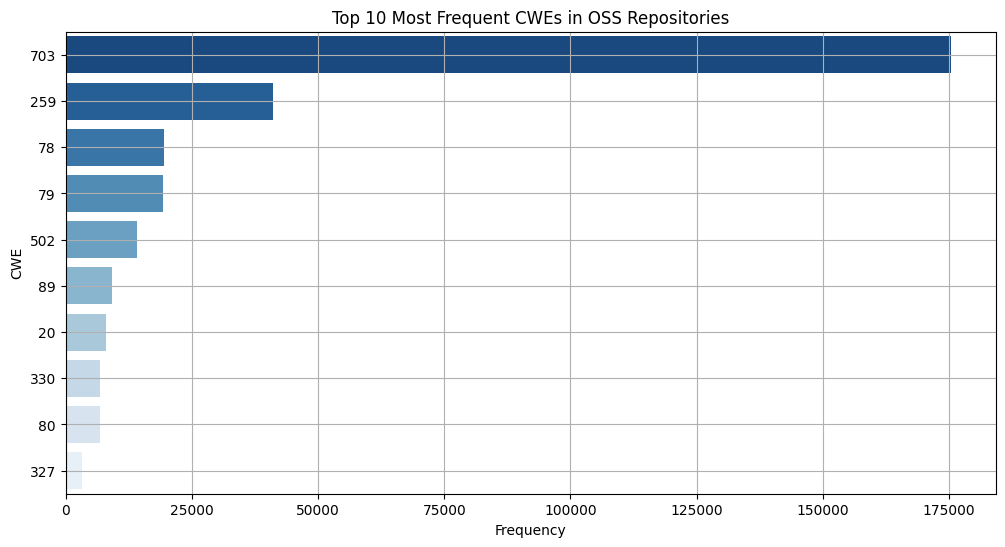

In [8]:
import json
from collections import Counter

# Convert CWE JSON column to dictionaries
df["CWE_Counts"] = df["CWE_Counts"].apply(json.loads)

# Aggregate CWE counts across all commits
cwe_counter = Counter()
for cwe_dict in df["CWE_Counts"]:
    cwe_counter.update(cwe_dict)

# Convert to DataFrame and sort
cwe_df = pd.DataFrame(cwe_counter.items(), columns=["CWE", "Count"]).sort_values(by="Count", ascending=False)

# Plot top 10 CWEs
plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="CWE", data=cwe_df.head(10), palette="Blues_r")
plt.xlabel("Frequency")
plt.ylabel("CWE")
plt.title("Top 10 Most Frequent CWEs in OSS Repositories")
plt.grid()
plt.show()
